In [7]:
import pandas as pd

# Load data from the Parquet file
df = pd.read_parquet("data_01_22.parquet")

# Count unique values in the 'Killed' column, including missing values
print("Unique values in the 'Killed' column:")
print(df['Killed'].value_counts(dropna=False))

# Count unique values in the 'Injured' column, including missing values
print("\nUnique values in the 'Injured' column:")
print(df['Injured'].value_counts(dropna=False))

Unique values in the 'Killed' column:
Killed
Nieokreślone (puste pole)    7110064
Na miejscu                     18905
30 dni                          8248
Name: count, dtype: int64

Unique values in the 'Injured' column:
Injured
Nieokreślone (puste pole)    6826895
Lekko                         215198
Ciężko                         95124
Name: count, dtype: int64


In [9]:
# Group by unique combinations of 'Killed' and 'Injured' and count occurrences
injury_combinations = df.groupby(['Killed', 'Injured']).size().reset_index(name='Count')

# Sort combinations by frequency in descending order
injury_combinations = injury_combinations.sort_values(by='Count', ascending=False)

# Display the result
print(injury_combinations)

                      Killed                    Injured    Count
5  Nieokreślone (puste pole)  Nieokreślone (puste pole)  6799743
4  Nieokreślone (puste pole)                      Lekko   215198
3  Nieokreślone (puste pole)                     Ciężko    95123
2                 Na miejscu  Nieokreślone (puste pole)    18905
1                     30 dni  Nieokreślone (puste pole)     8247
0                     30 dni                     Ciężko        1


In [11]:
# Define injury severity based on the 'Killed' and 'Injured' columns
def classify_injury(row):
    if row['Killed'] == 'Na miejscu':
        return 'Killed on scene'
    elif row['Killed'] == '30 dni':
        return 'Killed within 30 days'
    elif row['Injured'] == 'Ciężko':
        return 'Seriously injured'
    elif row['Injured'] == 'Lekko':
        return 'Slightly injured'
    elif row['Killed'] == 'Nieokreślone (puste pole)' and row['Injured'] == 'Nieokreślone (puste pole)':
        return 'Uninjured'
    else:
        return 'Unknown'

# Create a new column with injury severity categories
df['Injury severity'] = df.apply(classify_injury, axis=1)

# Display distribution of the new variable
print(df['Injury severity'].value_counts(dropna=False))

Injury severity
Uninjured                6799743
Slightly injured          215198
Seriously injured          95123
Killed on scene            18905
Killed within 30 days       8248
Name: count, dtype: int64


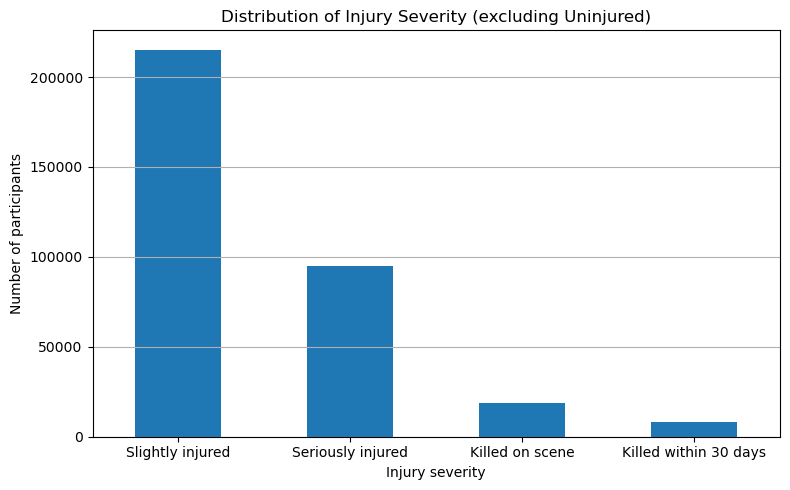

In [15]:
# Count values in 'Injury severity' and exclude uninjured participants
severity_counts = df['Injury severity'].value_counts().drop('Uninjured', errors='ignore')

# Plot the distribution as a bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
severity_counts.plot(kind='bar')
plt.title('Distribution of Injury Severity (excluding Uninjured)')
plt.xlabel('Injury severity')
plt.ylabel('Number of participants')
plt.xticks(rotation=0)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

<Figure size 1000x500 with 0 Axes>

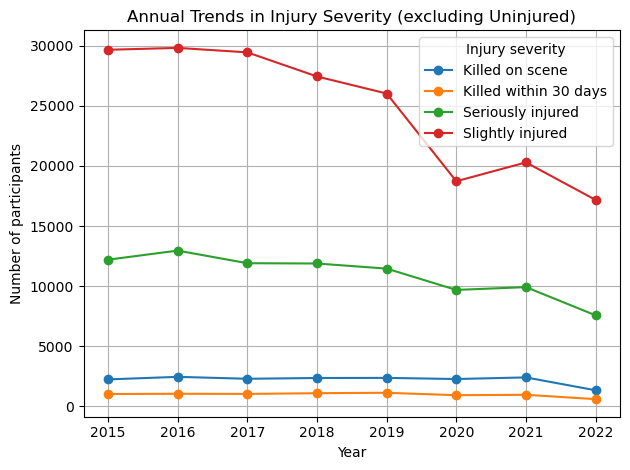

In [27]:
# Convert 'Date of event' to datetime and extract year
df['Date of event'] = pd.to_datetime(df['Date of event'], errors='coerce')
df['Year'] = df['Date of event'].dt.year

# Group by year and injury severity
yearly_counts = df.groupby(['Year', 'Injury severity']).size().unstack().fillna(0)

# Drop the 'Uninjured' category
yearly_counts = yearly_counts.drop(columns='Uninjured', errors='ignore')

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
yearly_counts.plot(kind='line', marker='o')
plt.title('Annual Trends in Injury Severity (excluding Uninjured)')
plt.xlabel('Year')
plt.ylabel('Number of participants')
plt.grid(True)
plt.tight_layout()
plt.legend(title='Injury severity')
plt.show()

In [29]:
yearly_counts

Injury severity,Killed on scene,Killed within 30 days,Seriously injured,Slightly injured
Year,,,,
2015.0,2225,1007,12196,29678
2016.0,2437,1028,12953,29835
2017.0,2277,1015,11901,29464
2018.0,2341,1076,11878,27455
2019.0,2351,1109,11452,26036
2020.0,2256,908,9678,18729
2021.0,2391,943,9909,20297
2022.0,1317,579,7562,17174


<Figure size 1200x600 with 0 Axes>

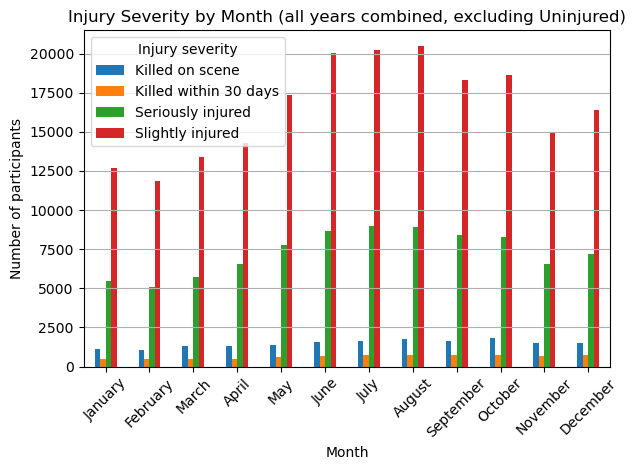

In [33]:
# Convert 'Date of event' to datetime and extract month number and name
df['Date of event'] = pd.to_datetime(df['Date of event'], errors='coerce')
df['Month'] = df['Date of event'].dt.month

# Map month number to month name
month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
df['Month name'] = df['Month'].map(month_names)

# Group by month name (ordered) and injury severity
monthly_counts = df.groupby(['Month name', 'Injury severity']).size().unstack().fillna(0)

# Ensure months are in calendar order
month_order = list(month_names.values())
monthly_counts = monthly_counts.reindex(index=month_order)

# Drop 'Uninjured' category
monthly_counts = monthly_counts.drop(columns='Uninjured', errors='ignore')

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
monthly_counts.plot(kind='bar', stacked=False)
plt.title('Injury Severity by Month (all years combined, excluding Uninjured)')
plt.xlabel('Month')
plt.ylabel('Number of participants')
plt.xticks(rotation=45)
plt.legend(title='Injury severity')
plt.tight_layout()
plt.grid(axis='y')
plt.show()


In [35]:
monthly_counts

Injury severity,Killed on scene,Killed within 30 days,Seriously injured,Slightly injured
Month name,,,,
January,1143,513,5459,12661
February,1077,483,5070,11854
March,1304,465,5745,13411
April,1309,479,6559,14281
May,1403,596,7751,17382
June,1537,698,8634,20042
July,1606,765,8956,20223
August,1729,738,8921,20461
September,1645,719,8389,18326


<Figure size 1200x600 with 0 Axes>

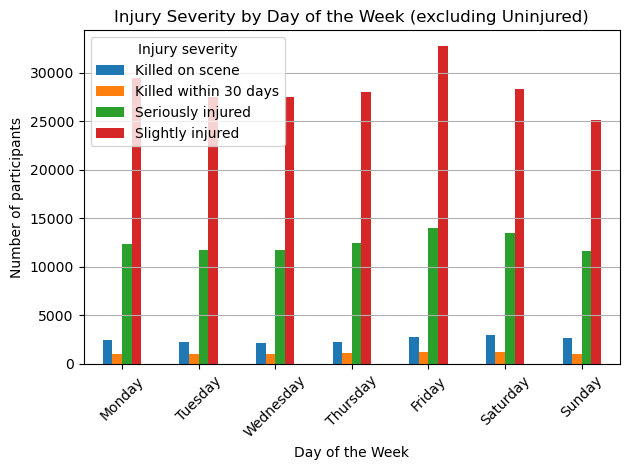

In [37]:
# Convert 'Date of event' to datetime and extract day of week
df['Date of event'] = pd.to_datetime(df['Date of event'], errors='coerce')
df['Weekday'] = df['Date of event'].dt.dayofweek  # 0 = Monday, 6 = Sunday

# Map numeric weekdays to names
weekday_names = {
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
    4: 'Friday', 5: 'Saturday', 6: 'Sunday'
}
df['Weekday name'] = df['Weekday'].map(weekday_names)

# Group by weekday name and injury severity
weekday_counts = df.groupby(['Weekday name', 'Injury severity']).size().unstack().fillna(0)

# Ensure correct order of weekdays
ordered_weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts = weekday_counts.reindex(index=ordered_weekdays)

# Drop 'Uninjured' category
weekday_counts = weekday_counts.drop(columns='Uninjured', errors='ignore')

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
weekday_counts.plot(kind='bar', stacked=False)
plt.title('Injury Severity by Day of the Week (excluding Uninjured)')
plt.xlabel('Day of the Week')
plt.ylabel('Number of participants')
plt.xticks(rotation=45)
plt.legend(title='Injury severity')
plt.tight_layout()
plt.grid(axis='y')
plt.show()


In [39]:
weekday_counts

Injury severity,Killed on scene,Killed within 30 days,Seriously injured,Slightly injured
Weekday name,,,,
Monday,2458,1011,12379,29489
Tuesday,2243,1007,11772,27502
Wednesday,2206,1039,11786,27507
Thursday,2306,1087,12436,28021
Friday,2745,1262,14054,32725
Saturday,3001,1231,13451,28331
Sunday,2636,1028,11651,25093


In [43]:
# Drop auxiliary columns before saving
df = df.drop(columns=['Month name', 'Weekday name'], errors='ignore')

# Save the cleaned DataFrame to a Parquet file
df.to_parquet("data_02_00.parquet", index=False)